# Pymaceuticals Inc.
---

### Analysis

- Capomulin treatment of mouse l509 had a max of 48 mm3 of Tumor Volume on the 20th day but after that it started to decrease.
 - The correlation was 0.84 which shows that it had a fairly strong positive relationship between weight (g) and the average tumor volume (mm3).
 - Among all the drug regimen, ketapril had the highest mean for Tumor Volume (mm3) with 55.235638 compared to the lowest mean from Ramicane with 40.216745 Tumor Volume (mm3). 

In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
study_results
# Combine the data into a single DataFrame
mouse_study=pd.merge(study_results,mouse_metadata,how="outer",on=["Mouse ID","Mouse ID"])

# Display the data table for preview
mouse_study

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [13]:
# Checking the number of mice.
mouse_count=mouse_study["Mouse ID"].nunique()
mouse_count

249

In [14]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_id=mouse_study.loc[mouse_study.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID'].unique()
duplicate_mouse_id

array(['g989'], dtype=object)

In [15]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_df=mouse_study.loc[mouse_study["Mouse ID"]=="g989",:]
duplicate_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [17]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_clean=mouse_study[mouse_study['Mouse ID'].isin(duplicate_df)==False]
mouse_clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [22]:
# Checking the number of mice in the clean DataFrame.
mouse_count2=mouse_clean['Mouse ID'].nunique()
mouse_count2

249

## Summary Statistics

In [24]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean=mouse_clean['Tumor Volume (mm3)'].groupby(mouse_clean['Drug Regimen']).mean()
median=mouse_clean['Tumor Volume (mm3)'].groupby(mouse_clean['Drug Regimen']).median()
var=mouse_clean['Tumor Volume (mm3)'].groupby(mouse_clean['Drug Regimen']).var()
std=mouse_clean['Tumor Volume (mm3)'].groupby(mouse_clean['Drug Regimen']).std()
sem=mouse_clean['Tumor Volume (mm3)'].groupby(mouse_clean['Drug Regimen']).sem()
# Assemble the resulting series into a single summary DataFrame.
mouse_summary=pd.DataFrame({"Mean Tumor Volume": mean, "Median Tumor Volume": median,
                            "Tumor Volume Variance": var, "Tumor Volume Std. Dev.": std,
                            "Tumor Volume Std. Err.": sem})

mouse_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [25]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
mouse_agg= mouse_clean.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean','median','var','std','sem'])
mouse_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

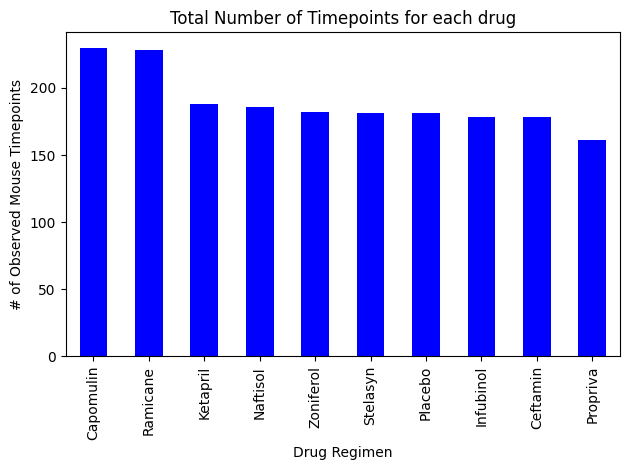

In [170]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Find the total number of rows for each drug
mouse_total=mouse_clean["Drug Regimen"].value_counts()
mouse_total
# label the graph
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.title('Total Number of Timepoints for each drug')

# Finish the plot
bar_pandas=mouse_total.plot(kind="bar",color="blue")
plt.tight_layout()
plt.show()

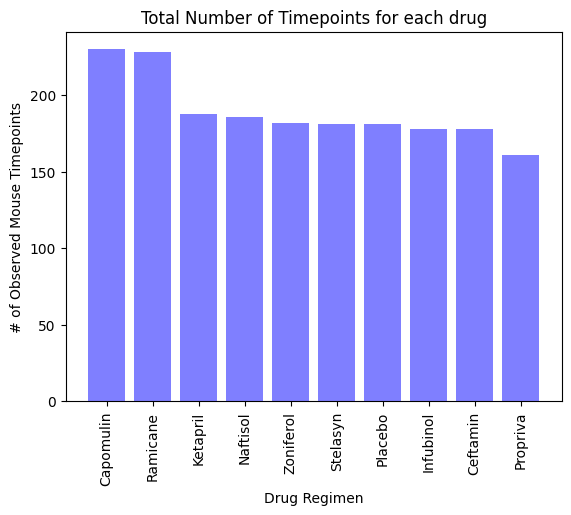

In [169]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis=mouse_total.index.values
y_axis=mouse_total.values
bar_pyplot=plt.bar(x_axis,y_axis,color="blue",alpha=0.5, align="center")
# label the graph
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.title('Total Number of Timepoints for each drug')
plt.xticks(rotation="vertical")

plt.show()

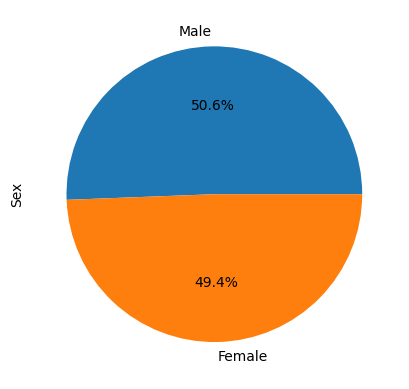

In [165]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender=mouse_clean["Sex"].value_counts()
pie_pandas=gender.plot(kind='pie',autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

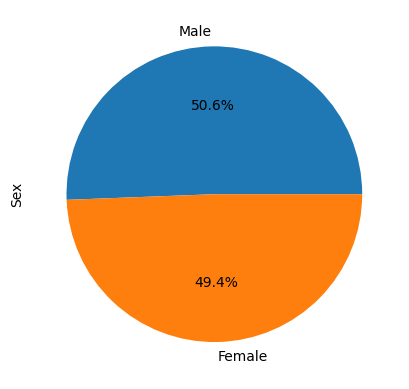

In [164]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels=["Male","Female"]
pie_pyplot=plt.pie(gender,labels=labels,autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [155]:
Capomulin=mouse_clean.loc[mouse_clean["Drug Regimen"]=="Capomulin",:]
Ramicane=mouse_clean.loc[mouse_clean["Drug Regimen"]=="Ramicane",:]
Infubinol=mouse_clean.loc[mouse_clean["Drug Regimen"]=="Infubinol",:]
Ceftamin=mouse_clean.loc[mouse_clean["Drug Regimen"]=="Ceftamin",:]

In [156]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment=["Capomulin","Ramicane","Infubinol","Ceftamin"]
filter=mouse_clean[mouse_clean['Drug Regimen'].isin(treatment)]
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint=filter.groupby('Mouse ID')['Timepoint'].max()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge=pd.merge(last_timepoint,mouse_clean[['Mouse ID','Timepoint','Tumor Volume (mm3)']],on=['Mouse ID','Timepoint'],how='inner')
last_timepoint

Mouse ID
a203    45
a251    45
a275    45
a411    45
a444    45
        ..
y769    45
y793    45
y865    45
z578    45
z581    45
Name: Timepoint, Length: 100, dtype: int64

In [157]:
# Put treatments into a list for for loop (and later for plot labels)
treatment=["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tum_vol_data=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers.   
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
for drug in treatment:
    drug_data=mouse_clean[mouse_clean['Drug Regimen']==drug]
    tum_vol=drug_data['Tumor Volume (mm3)']
    tum_vol_data.append(tum_vol)


In [158]:
# IQR 
quartiles=tum_vol.quantile([0.25,.5,0.75])
low_quart=quartiles[0.25]
up_quart=quartiles[0.75]
iqr=up_quart-low_quart
low_bound=low_quart - (1.5*iqr)
up_bound=up_quart + (1.5*iqr)
outliers=drug_data[(drug_data['Tumor Volume (mm3)'] < low_bound) | (drug_data['Tumor Volume (mm3)'] < up_bound)]
outliers

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1304,x822,0,45.000000,0,Ceftamin,Male,3,29
1305,x822,5,45.671104,1,Ceftamin,Male,3,29
1306,x822,10,48.983717,1,Ceftamin,Male,3,29
1307,x822,15,49.694665,1,Ceftamin,Male,3,29
1308,x822,20,51.914910,2,Ceftamin,Male,3,29
...,...,...,...,...,...,...,...,...
1645,q483,25,52.430066,1,Ceftamin,Male,6,26
1646,q483,30,54.952226,1,Ceftamin,Male,6,26
1647,q483,35,59.253484,1,Ceftamin,Male,6,26
1648,q483,40,64.192341,1,Ceftamin,Male,6,26


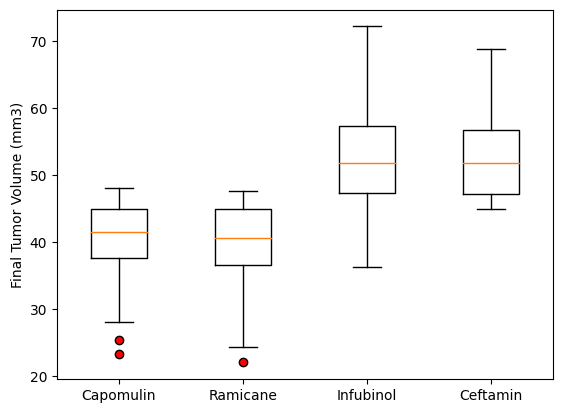

In [159]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
circle= dict(markerfacecolor="red",marker="o")
fig,ax2=plt.subplots()
box=ax2.boxplot(tum_vol_data,labels=treatment,flierprops=circle)
ax2.set_ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

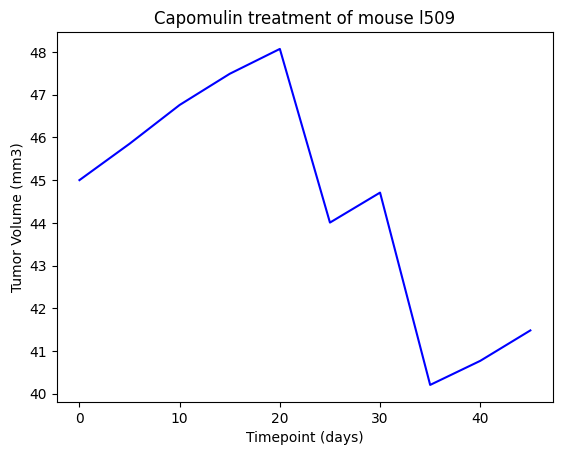

In [160]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Capo_line=Capomulin.loc[Capomulin["Mouse ID"]=="l509",:]
x_axis=Capo_line["Timepoint"]
y_axis=Capo_line["Tumor Volume (mm3)"]
fig1,ax1=plt.subplots()
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.plot(x_axis,y_axis,color="blue")
plt.show()

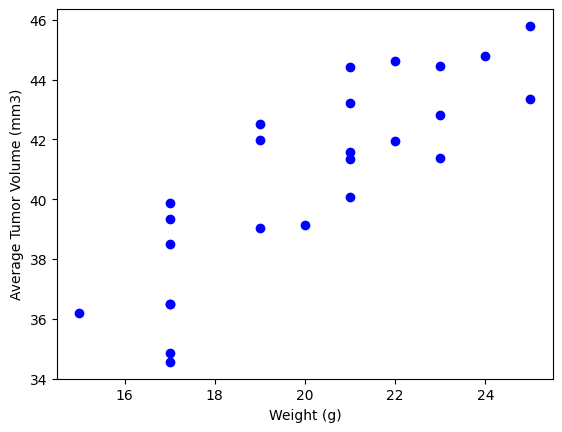

In [161]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
fig1,ax1=plt.subplots()
tum_vol=Capomulin.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
weight=Capomulin.groupby('Mouse ID')['Weight (g)'].mean()
plt.scatter(weight,tum_vol,color="blue")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


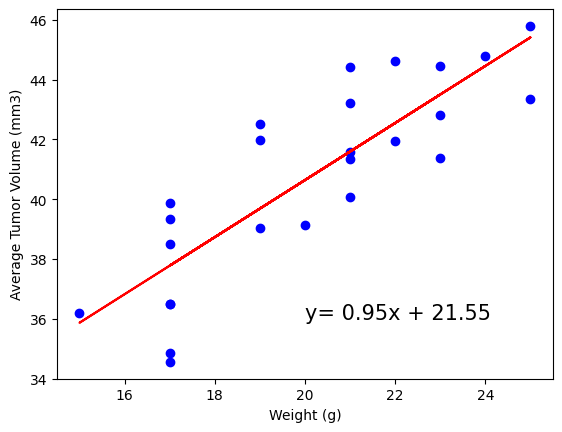

In [162]:
# Calculate the correlation coefficient and a linear regression model 
corr=st.pearsonr(weight,tum_vol)
print(f"The correlation between mouse weight and the average tumor volume is {round(corr[0],2)}")
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
(slope,intercept,rvalue,pvalue,stderr)=st.linregress(weight,tum_vol)
regress_value=weight*slope + intercept
line_eq="y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight,tum_vol,color="blue")
plt.plot(weight,regress_value,color="red")
plt.annotate(line_eq,(20,36),fontsize=15)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()